# 1. Setup

In [1]:
# Install dependencies
!apt-get update
!apt-get upgrade

!apt-get install -y build-essential
!apt-get install -y cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev
!apt-get install -y libavcodec-dev libavformat-dev libswscale-d
!apt-get install -y libopencv-dev

!apt-get install -y g++-5
!apt-get install -y gcc-5

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [91.7 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [908 kB]
Get:14 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bion

In [15]:
!/usr/local/cuda/bin/nvcc --version
# Check if GPU is selected as hardware accelerator
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if not '/device:GPU:0' in device_name:
    print('\nERROR: GPU is not selected as hardware accelerator!')
else:
    print(device_name)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
/device:GPU:0


In [16]:
# Clone and compile darknet
!git clone https://github.com/AlexeyAB/darknet
%cd darknet

!ls
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!make

fatal: destination path 'darknet' already exists and is not an empty directory.
[Errno 20] Not a directory: 'darknet'
/content/darknet
3rdparty      cmake		      image_yolov2.sh	     obj
appveyor.yml  CMakeLists.txt	      image_yolov3.sh	     README.md
backup	      darknet		      include		     results
build	      DarknetConfig.cmake.in  json_mjpeg_streams.sh  scripts
build.ps1     darknet.py	      LICENSE		     src
build.sh      darknet_video.py	      Makefile		     video_v2.sh
cfg	      data		      net_cam_v3.sh	     video_yolov3.sh
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DGPU -c ./src/http_stream.cpp -o obj/http_stream.o
./src/

In [17]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

!ls "/content/gdrive/My Drive/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
 โปรแกรม			    'Image Classification(Covid-19)'
 แชร์ไฟล์				     JavaScript-21-Days-Challenge
 เล่มพี่ออฟ			     Matlab2014Linux
 โปรแกรมโปรเจค			     matlab2018
 โปรแกรมตัวจริง			     MyProject_2019
 วิชาโปรแกรมมิ่ง			     NN_CNN_RNN_Note.pdf
 เอกสารที่อาจารย์ชิตฝากปริ้น		     Node_Express_MongoDB
 01_AngularJS_NodeJS_MongoDB_MySQL  'Nodejs 5 IN 1 Workshop'
 1				     nsc_2020
 Basic-opencv-python		     object-detection
 Camera_Pi			     React
 code_comTest			     Thesis_รุ่นพี่
'Colab Notebooks'		     Thesis_2563
 comProject			    'Untitled Diagram (1).drawio'
 dataset			    'Untitled Diagram.drawio'
 Flutter


In [0]:
# Create a symlink
!ln -s "/content/gdrive/My Drive/dataset/" "/content/dataset"
!ln -s "/content/gdrive/My Drive/backup/" "/content/backup"

In [6]:
!./darknet detector train ./path-to-.data ./path-to-.cfg ./path-to-weight

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
Couldn't open file: ./path-to-.data


In [7]:
!./darknet detector calc_anchors /content/object-detection/obj.data -num_of_clusters 6 -width 416 -height 416


 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 

 num_of_clusters = 6, width = 416, height = 416 
Couldn't open file: /content/object-detection/obj.data


# 2. Train

In [18]:
# Start a new training
!./darknet detector train /content/dataset/obj.data /content/dataset/yolov3test.cfg /content/dataset/darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000000, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.849731, GIOU: 0.848792), Class: 0.999833, Obj: 0.998987, No Obj: 0.005230, .5R: 1.000000, .75R: 0.750000, count: 4, class_loss = 0.000005, iou_loss = 0.061597, total_loss = 0.061602 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000001, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000000, .5R: 0.000000, .75R: 0.000000, count: 1

In [9]:
!./darknet detector train /content/object-detection/obj.data /content/object-detection/yolov3-label.cfg /content/object-detection/backup/yolov3_1000.weights -dont_show

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
Couldn't open file: /content/object-detection/obj.data


OR

In [10]:
# Continue training
!./darknet detector train /content/object-detection/trainer.data /content/object-detection/yolov3-tiny.cfg /content/object-detection/backup/yolov3-tiny_last.weights -dont_show

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
Couldn't open file: /content/object-detection/trainer.data


# 3. Test

In [51]:
# Run the detector
!./darknet detector test /content/dataset/obj.data /content/dataset/yolov3test.cfg /content/backup/yolov3test_final.weights /content/dataset/test9.jpg  

 CUDA-version: 10010 (10010), GPU count: 1  
 OpenCV isn't used - data augmentation will be slow 
 compute_capability = 750, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
 

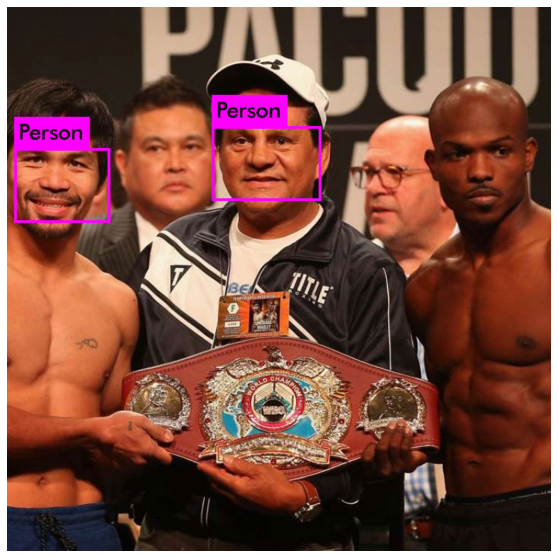

In [52]:
# Show the generated image
def detect(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

detect('predictions.jpg')